In [32]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from collections import Counter
import seaborn as sns

In [33]:
def collect_metrics(root_dir):

    depth = 2

    dict_res_camem = dict()
    dict_res_xlm = dict()
    
    for subdir, dirs, files in os.walk(root_dir):
        if subdir[len(root_dir):].count(os.sep) < depth:
            for file_ in files:
                if file_ == "xai_metrics.json":
                    with open(subdir + "/" + file_) as f:
                        d = json.load(f)
                        log_odd_pos = d["log_odd_pos"]
                        anti_log_odd_pos = d["anti_log_odd_pos"]
                        log_odd_neg = d["log_odd_neg"]
                        anti_log_odd_neg = d["anti_log_odd_neg"]
                        
                    model_type = subdir.split(os.sep)[-1].split("_")[0]
                    if model_type == "camem":
                        dataset_name = " ".join(subdir.split(os.sep)[-1].split("_")[1:])
                        dict_res_camem[dataset_name] = {"log odd pos": log_odd_pos, "anti log odd pos": anti_log_odd_pos, "log odd neg": log_odd_neg, "anti log odd neg": anti_log_odd_neg}
                    elif model_type == "xlm":
                        dataset_name = " ".join(subdir.split(os.sep)[-1].split("_")[1:])
                        dict_res_xlm[dataset_name] = {"log odd pos": log_odd_pos, "anti log odd pos": anti_log_odd_pos, "log odd neg": log_odd_neg, "anti log odd neg": anti_log_odd_neg}

    return dict(sorted(dict_res_camem.items())), dict(sorted(dict_res_xlm.items()))

def _average_dicts(dicts):
    avg_dict = collections.defaultdict(lambda: 0)
    
    for i, d in enumerate(dicts):
        for k, v in d.items():
            avg_dict[k] += v
        
    for k, v in avg_dict.items():
        avg_dict[k] /= (i+1)
    
    return avg_dict

def average_over_users(res):
    averaged_en = collections.defaultdict(list)
    averaged_it = collections.defaultdict(list)

    for k, v in res.items():
        if "en" in k and not ("nf" in k):
            averaged_en[" ".join(k.split(" ")[0:2])].append(v)
        elif "it" in k and not ("nf" in k):
            averaged_it[" ".join(k.split(" ")[0:2])].append(v)
    
    result_en = dict()
    result_it = dict()
            
    for k, v in averaged_en.items():
        result_en["avg en " + k] = _average_dicts(v)
        
    for k, v in averaged_it.items():
        result_it["avg it " + k] = _average_dicts(v)
                        
    return result_en, result_it

def process_to_present(res, column_width="1.1cm", plot_transpose=True):
    df_res = pd.DataFrame.from_dict(res).T
    # df_res = df_res.rename(columns=mapping_columns_names)
    if not plot_transpose:
        df_res = df_res.T
    s = df_res.style
    s.format(na_rep='MISS', precision=2)
    print(s.to_latex(column_format='l'+('p{'+f'{column_width}'+'}')*len(df_res.columns)))


def divide_p_np(res):
    out_p = {}
    out_np = {}
    
    for k, v in res.items():
        if "np" in k:
            out_np[k] = v
        else:
            out_p[k] = v
            
    return out_p, out_np

In [34]:
dict_res_camem, dict_res_xlm = collect_metrics("../output/sentipolc_10_50")

## CAMEM

In [35]:
_, avg = average_over_users(dict_res_camem)
camem_results = {**dict_res_camem, ** avg}

In [36]:
pd.DataFrame(camem_results).T

,log odd pos,anti log odd pos,log odd neg,anti log odd neg
np f it1,-0.332081,-0.231492,-1.019617,-0.573741
np f it26,-0.230656,-0.402458,-0.382032,-2.180722
np f it38,-0.185415,-0.228348,-1.065161,-1.152831
np f it43,-0.305736,-0.304551,-0.326869,-1.424489
np f it44,-0.197462,-0.127656,-0.256532,-2.095115
np nf it,-0.990106,-0.992914,-0.382311,-0.143562
p f it1,-0.296874,-0.384096,-0.441601,-0.569368
p f it26,-0.356634,-0.445279,-0.563415,-0.958415
p f it38,-0.122445,-1.038087,-0.337653,-0.799466
p f it43,-0.317259,-0.426571,-0.268793,-0.573713


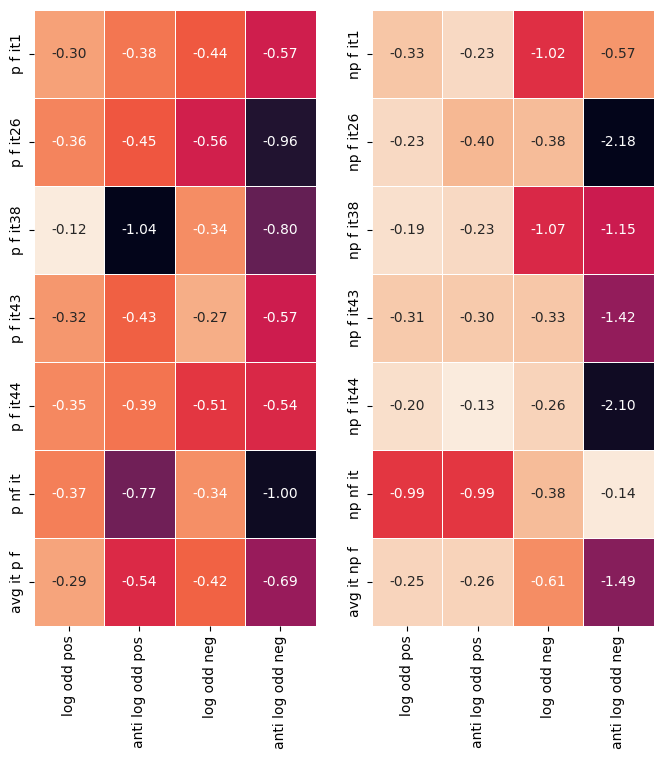

In [37]:
camem_res_p, camem_res_np = divide_p_np(camem_results)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))
sns.heatmap(pd.DataFrame(camem_res_p).T, annot=True, fmt=".2f", linewidth=.5, cbar=False, ax=ax1)
sns.heatmap(pd.DataFrame(camem_res_np).T, annot=True, fmt=".2f", linewidth=.5, cbar=False, ax=ax2)
plt.show()

In [38]:
process_to_present(camem_results)

\begin{tabular}{lp{1.1cm}p{1.1cm}p{1.1cm}p{1.1cm}}
 & log odd pos & anti log odd pos & log odd neg & anti log odd neg \\
np f it1 & -0.33 & -0.23 & -1.02 & -0.57 \\
np f it26 & -0.23 & -0.40 & -0.38 & -2.18 \\
np f it38 & -0.19 & -0.23 & -1.07 & -1.15 \\
np f it43 & -0.31 & -0.30 & -0.33 & -1.42 \\
np f it44 & -0.20 & -0.13 & -0.26 & -2.10 \\
np nf it & -0.99 & -0.99 & -0.38 & -0.14 \\
p f it1 & -0.30 & -0.38 & -0.44 & -0.57 \\
p f it26 & -0.36 & -0.45 & -0.56 & -0.96 \\
p f it38 & -0.12 & -1.04 & -0.34 & -0.80 \\
p f it43 & -0.32 & -0.43 & -0.27 & -0.57 \\
p f it44 & -0.35 & -0.39 & -0.51 & -0.54 \\
p nf it & -0.37 & -0.77 & -0.34 & -1.00 \\
avg it np f & -0.25 & -0.26 & -0.61 & -1.49 \\
avg it p f & -0.29 & -0.54 & -0.42 & -0.69 \\
\end{tabular}



## XLM

In [39]:
_, avg_it = average_over_users(dict_res_xlm)
xlm_results = {**dict_res_xlm, **avg_it}

In [40]:
pd.DataFrame(xlm_results).T

,log odd pos,anti log odd pos,log odd neg,anti log odd neg
np f it1,-0.151326,-0.600118,-0.254033,-0.605236
np f it26,-0.172635,-0.275839,-0.351348,-0.747018
np f it38,-0.379983,-0.140927,-0.328667,-0.700962
np f it43,-0.168352,-0.578524,-0.248301,-0.323331
np f it44,-0.328112,-0.199065,-0.383796,-0.220205
np nf it,-0.913470,-1.255869,-0.382474,-0.163757
p f it1,-0.041959,-0.071890,-0.471652,-0.462844
p f it26,-0.089781,-0.297771,-0.074487,-0.036794
p f it38,-0.104675,-0.500860,-0.037900,-0.035405
p f it43,-0.039496,-0.161230,-0.046423,-0.068898


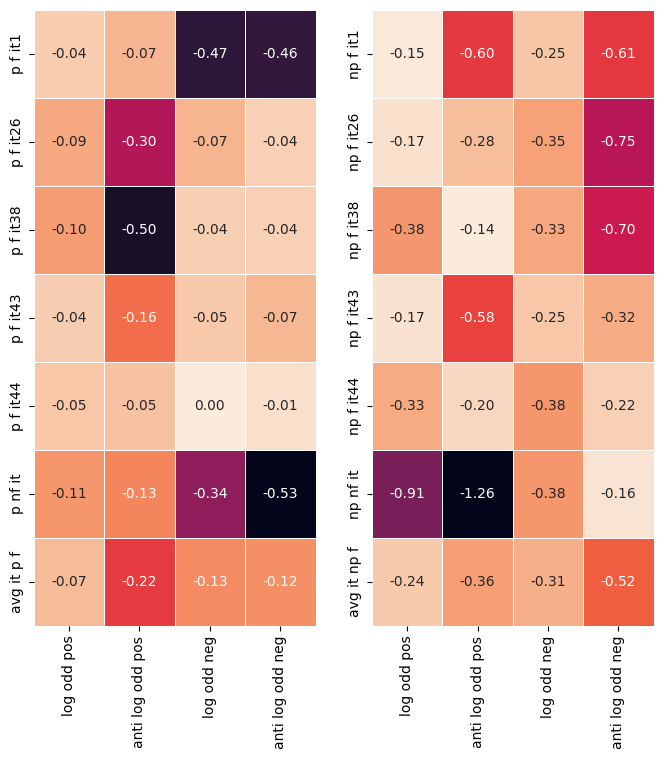

In [41]:
xlm_res_p, xlm_res_np = divide_p_np(xlm_results)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))
sns.heatmap(pd.DataFrame(xlm_res_p).T, annot=True, fmt=".2f", linewidth=.5, cbar=False, ax=ax1)
sns.heatmap(pd.DataFrame(xlm_res_np).T, annot=True, fmt=".2f", linewidth=.5, cbar=False, ax=ax2)
plt.show()

In [42]:
process_to_present(xlm_results)

\begin{tabular}{lp{1.1cm}p{1.1cm}p{1.1cm}p{1.1cm}}
 & log odd pos & anti log odd pos & log odd neg & anti log odd neg \\
np f it1 & -0.15 & -0.60 & -0.25 & -0.61 \\
np f it26 & -0.17 & -0.28 & -0.35 & -0.75 \\
np f it38 & -0.38 & -0.14 & -0.33 & -0.70 \\
np f it43 & -0.17 & -0.58 & -0.25 & -0.32 \\
np f it44 & -0.33 & -0.20 & -0.38 & -0.22 \\
np nf it & -0.91 & -1.26 & -0.38 & -0.16 \\
p f it1 & -0.04 & -0.07 & -0.47 & -0.46 \\
p f it26 & -0.09 & -0.30 & -0.07 & -0.04 \\
p f it38 & -0.10 & -0.50 & -0.04 & -0.04 \\
p f it43 & -0.04 & -0.16 & -0.05 & -0.07 \\
p f it44 & -0.05 & -0.05 & 0.00 & -0.01 \\
p nf it & -0.11 & -0.13 & -0.34 & -0.53 \\
avg it np f & -0.24 & -0.36 & -0.31 & -0.52 \\
avg it p f & -0.07 & -0.22 & -0.13 & -0.12 \\
\end{tabular}

